<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(_2_8)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-2.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2.8_n20.csv',
 'data_multi_delta_-2.8_n30.csv',
 'data_multi_delta_-2.8_n60.csv',
 'data_multi_delta_-2.8_n120.csv',
 'data_multi_delta_-2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.8_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,51.029281,39.585940,93.874565,0.004140,194.493925,194.490245,0.003680
1,0.0,1.0,60.832094,66.155226,84.443744,0.004792,221.435856,221.431002,0.004855
2,0.0,2.0,58.631366,49.501755,60.945837,-0.000234,179.078724,179.078827,-0.000102
3,0.0,3.0,69.662376,28.502180,44.962386,-0.005701,153.121241,153.126313,-0.005072
4,0.0,4.0,94.440474,84.455642,34.099740,0.003395,222.999251,222.994044,0.005207
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,53.982254,26.520146,79.793200,-0.005429,170.290172,170.292803,-0.002631
119996,999.0,116.0,63.240532,22.503084,93.267353,-0.017519,188.993450,189.007643,-0.014193
119997,999.0,117.0,48.008160,78.635008,98.786898,-0.002062,235.428004,235.428535,-0.000531
119998,999.0,118.0,42.383094,52.373718,47.698809,0.001962,152.457583,152.454713,0.002869


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,51.029281,39.585940,93.874565,0.004140,194.493925,194.490245,0.003680
1,0.0,1.0,60.832094,66.155226,84.443744,0.004792,221.435856,221.431002,0.004855
2,0.0,2.0,58.631366,49.501755,60.945837,-0.000234,179.078724,179.078827,-0.000102
3,0.0,3.0,69.662376,28.502180,44.962386,-0.005701,153.121241,153.126313,-0.005072
4,0.0,4.0,94.440474,84.455642,34.099740,0.003395,222.999251,222.994044,0.005207
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,53.982254,26.520146,79.793200,-0.005429,170.290172,170.292803,-0.002631
119996,999.0,116.0,63.240532,22.503084,93.267353,-0.017519,188.993450,189.007643,-0.014193
119997,999.0,117.0,48.008160,78.635008,98.786898,-0.002062,235.428004,235.428535,-0.000531
119998,999.0,118.0,42.383094,52.373718,47.698809,0.001962,152.457583,152.454713,0.002869


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    51.029281  39.585940  93.874565  0.004140  194.493925   
      1.0    60.832094  66.155226  84.443744  0.004792  221.435856   
      2.0    58.631366  49.501755  60.945837 -0.000234  179.078724   
      3.0    69.662376  28.502180  44.962386 -0.005701  153.121241   
      4.0    94.440474  84.455642  34.099740  0.003395  222.999251   
...                ...        ...        ...       ...         ...   
999.0 115.0  53.982254  26.520146  79.793200 -0.005429  170.290172   
      116.0  63.240532  22.503084  93.267353 -0.017519  188.993450   
      117.0  48.008160  78.635008  98.786898 -0.002062  235.428004   
      118.0  42.383094  52.373718  47.698809  0.001962  152.457583   
      119.0  23.790553  61.117026  97.906808  0.003600  192.817987   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    194.490245  0.003680  
      1.0    221.431002  0.004855  
      2.0    179.078827 -0.000102  
      3.0    153.126313 -0.005072  
      4.0    222.994044  0.005207  
...                 ...       ...  
999.0 115.0  170.292803 -0.002631  
      116.0  189.007643 -0.014193  
      117.0  235.428535 -0.000531  
      118.0  152.454713  0.002869  
      119.0  192.812152  0.005835  

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    51.029281  39.585940  93.874565  0.004140  194.493925   
      1.0    60.832094  66.155226  84.443744  0.004792  221.435856   
      2.0    58.631366  49.501755  60.945837 -0.000234  179.078724   
      3.0    69.662376  28.502180  44.962386 -0.005701  153.121241   
      4.0    94.440474  84.455642  34.099740  0.003395  222.999251   
...                ...        ...        ...       ...         ...   
999.0 115.0  53.982254  26.520146  79.793200 -0.005429  170.290172   
      116.0  63.240532  22.503084  93.267353 -0.017519  188.993450   
      117.0  48.008160  78.635008  98.786898 -0.002062  235.428004   
      118.0  42.383094  52.373718  47.698809  0.001962  152.457583   
      119.0  23.790553  61.117026  97.906808  0.003600  192.817987   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    194.490245  0.003680  
      1.0    221.431002  0.004855  
      2.0    179.078827 -0.000102  
      3.0    153.126313 -0.005072  
      4.0    222.994044  0.005207  
...                 ...       ...  
999.0 115.0  170.292803 -0.002631  
      116.0  189.007643 -0.014193  
      117.0  235.428535 -0.000531  
      118.0  152.454713  0.002869  
      119.0  192.812152  0.005835  

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,51.029281,39.585940,93.874565,0.004140,194.493925,194.490245,0.003680
1,0.0,1.0,60.832094,66.155226,84.443744,0.004792,221.435856,221.431002,0.004855
2,0.0,2.0,58.631366,49.501755,60.945837,-0.000234,179.078724,179.078827,-0.000102
3,0.0,3.0,69.662376,28.502180,44.962386,-0.005701,153.121241,153.126313,-0.005072
4,0.0,4.0,94.440474,84.455642,34.099740,0.003395,222.999251,222.994044,0.005207
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,53.982254,26.520146,79.793200,-0.005429,170.290172,170.292803,-0.002631
119996,999.0,116.0,63.240532,22.503084,93.267353,-0.017519,188.993450,189.007643,-0.014193
119997,999.0,117.0,48.008160,78.635008,98.786898,-0.002062,235.428004,235.428535,-0.000531
119998,999.0,118.0,42.383094,52.373718,47.698809,0.001962,152.457583,152.454713,0.002869


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    51.029281  39.585940  93.874565  0.004140  194.493925   
      1.0    60.832094  66.155226  84.443744  0.004792  221.435856   
      2.0    58.631366  49.501755  60.945837 -0.000234  179.078724   
      3.0    69.662376  28.502180  44.962386 -0.005701  153.121241   
      4.0    94.440474  84.455642  34.099740  0.003395  222.999251   
...                ...        ...        ...       ...         ...   
999.0 115.0  53.982254  26.520146  79.793200 -0.005429  170.290172   
      116.0  63.240532  22.503084  93.267353 -0.017519  188.993450   
      117.0  48.008160  78.635008  98.786898 -0.002062  235.428004   
      118.0  42.383094  52.373718  47.698809  0.001962  152.457583   
      119.0  23.790553  61.117026  97.906808  0.003600  192.817987   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    194.490245  0.003680  
      1.0    221.431002  0.004855  
      2.0    179.078827 -0.000102  
      3.0    153.126313 -0.005072  
      4.0    222.994044  0.005207  
...                 ...       ...  
999.0 115.0  170.292803 -0.002631  
      116.0  189.007643 -0.014193  
      117.0  235.428535 -0.000531  
      118.0  152.454713  0.002869  
      119.0  192.812152  0.005835  

[120000 rows x 7 columns]

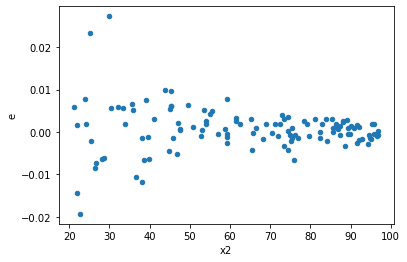

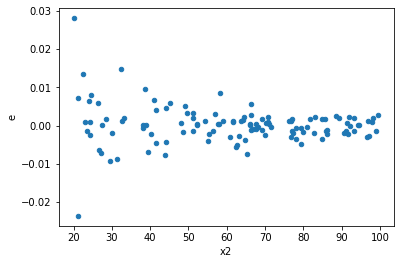

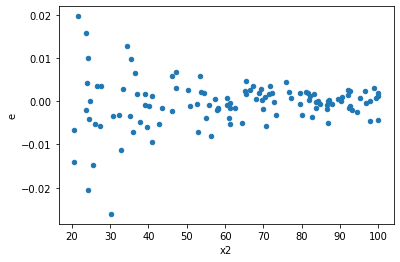

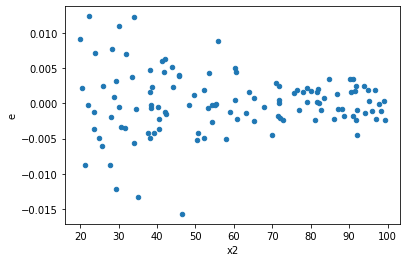

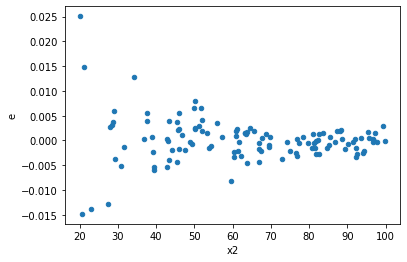

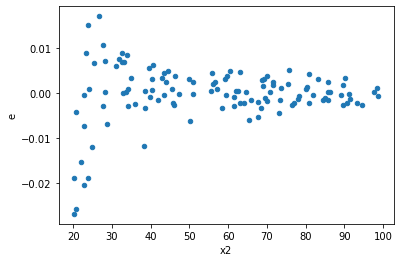

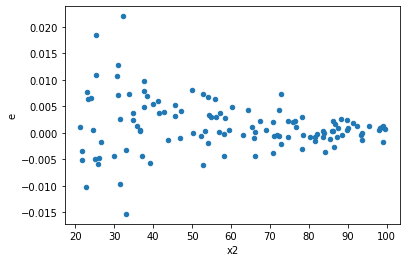

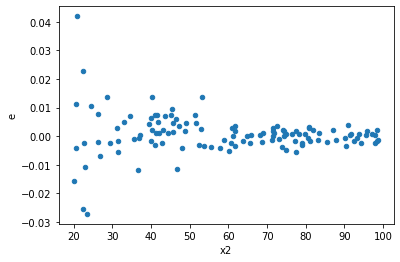

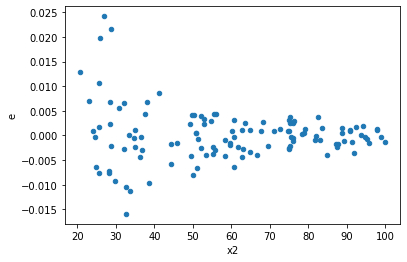

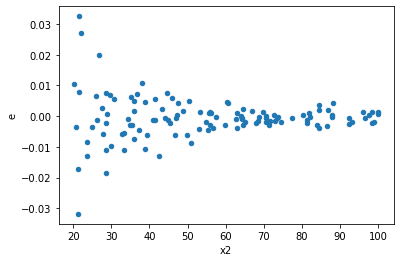

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
54.0,45.0,45.0,0.0011704103975159368,0.0017154809053218996,2.6009119944798595e-05,3.8121797896042216e-05,1.4657088735394126,0.20356178306543615,0.8982191084672819,0.10178089153271808,Reject005=1 : Homoscedasticity
173.0,45.0,45.0,0.0009436011725923449,0.0010432580721402164,2.0968914946496553e-05,2.318351271422703e-05,1.1056133697609607,0.7377628864604322,0.6311185567697839,0.3688814432302161,Reject005=1 : Homoscedasticity
253.0,45.0,45.0,0.0009914759483295756,0.0011426683899756573,2.2032798851768347e-05,2.539263088834794e-05,1.1524922938380993,0.6360686671321898,0.6819656664339051,0.3180343335660949,Reject005=1 : Homoscedasticity
384.0,45.0,45.0,0.002020732442324312,0.0020698189449932366,4.490516538498471e-05,4.5995976555405256e-05,1.0242914408858916,0.9361933442101851,0.5319033278949075,0.46809667210509254,Reject005=1 : Homoscedasticity
465.0,45.0,45.0,0.0014933935846977347,0.0015162499320597695,3.3186524104394104e-05,3.3694442934661543e-05,1.0153049722432421,0.9595939815624366,0.5202030092187817,0.4797969907812183,Reject005=1 : Homoscedasticity
581.0,45.0,45.0,0.0010561381324735504,0.0011247721529418172,2.346973627719001e-05,2.4994936732040383e-05,1.0649858369449468,0.8336737761919308,0.5831631119040346,0.4168368880959654,Reject005=1 : Homoscedasticity
597.0,45.0,45.0,0.000948503512477042,0.0009711613898216764,2.1077855832823157e-05,2.1581364218259473e-05,1.0238880268197033,0.9372383833703344,0.5313808083148328,0.4686191916851672,Reject005=1 : Homoscedasticity
873.0,45.0,45.0,0.0019019450921283288,0.0020745500623680995,4.226544649174064e-05,4.6101112497068875e-05,1.0907518155777152,0.7720441429645155,0.6139779285177422,0.38602207148225776,Reject005=1 : Homoscedasticity
970.0,45.0,45.0,0.0014674663188667448,0.001919046792440006,3.2610362641483216e-05,4.264548427644458e-05,1.3077279987741017,0.3715561748534566,0.8142219125732717,0.1857780874267283,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,0.0023402616688336405,0.0005592610029582709,5.200581486296979e-05,1.2428022287961577e-05,0.23897370555020037,4.384026645056528e-06,Reject005=0 : Heteroscedasticity
1.0,45.0,45.0,0.0016059639423493008,0.0007797115882130746,3.568808760776224e-05,1.7326924182512768e-05,0.48551002152169465,0.017089790162215457,Reject005=0 : Heteroscedasticity
2.0,45.0,45.0,0.003014613695163426,0.0003670044567856402,6.699141544807614e-05,8.155654595236449e-06,0.12174178647647403,7.890347452215506e-11,Reject005=0 : Heteroscedasticity
3.0,45.0,45.0,0.0013877869819270954,0.0005654290065253108,3.083971070949101e-05,1.2565089033895795e-05,0.40743213035486914,0.003208422147328616,Reject005=0 : Heteroscedasticity
4.0,45.0,45.0,0.002285992910269876,0.0004890382729951799,5.079984245044169e-05,1.0867517177670663e-05,0.21392816696769448,8.676521666162062e-07,Reject005=0 : Heteroscedasticity
5.0,45.0,45.0,0.0019788178837297898,0.0004202798890529665,4.3973730749550884e-05,9.339553090065922e-06,0.21238937272024183,7.786061656277419e-07,Reject005=0 : Heteroscedasticity
6.0,45.0,45.0,0.001327815222531982,0.0003157184993846696,2.9507004945155156e-05,7.015966652992658e-06,0.23777291751681598,4.0794446212401536e-06,Reject005=0 : Heteroscedasticity
7.0,45.0,45.0,0.0027676987545790276,0.0004964733407710628,6.150441676842283e-05,1.1032740906023618e-05,0.17938127838142465,5.661951091362073e-08,Reject005=0 : Heteroscedasticity
8.0,45.0,45.0,0.0014862840147808237,0.0011586593585528053,3.3028533661796085e-05,2.5747985745617896e-05,0.7795679338741109,0.40680285381697107,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    916
Reject005=1 : Homoscedasticity       84
Name: Result_test, dtype: int64